NAME: DEEPESH BHATTA
    


# Problem 2 (Dimension Reduction 60pts)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('mnist/mnist_train.csv')
X = train_data.drop("label",axis=1)
y = train_data['label']

In [3]:
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


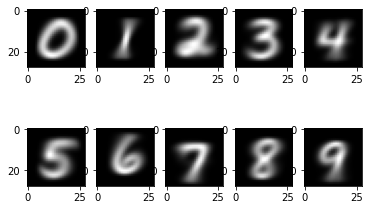

In [4]:
for i in range(10):
    digit = np.mean(X[y == i], axis = 0)
    digit = digit.values.reshape(28,28)
    plt.subplot(2, 5, i+1)
    plt.imshow(digit, cmap = "gray")

In [5]:
from sklearn.preprocessing import StandardScaler
X_fit = StandardScaler().fit_transform(X)

In [6]:
X_mean = np.mean(X_fit, axis = 0)
X_centered = (X_fit - X_mean)
covariance_matrix = np.cov(X_centered, rowvar = 0)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_values_sorted = np.argsort(-eigen_values)

## 2.2 (10pts) Run your PCA on MNIST dataset (you used this data for HW2). Taking too long time? You can use the tricks explained in the lecture notes.

In [7]:
from PCA import PCA
#Applying it to PCA function
X_reduced = PCA(X_fit , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(X_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(y, columns = ['label'])] , axis = 1)

principal_df.head()

,PC1,PC2,label
0,5.140478,-5.226445,1
1,-19.292332,6.032996,0
2,7.644503,-1.705813,1
3,0.474207,5.836139,4
4,-26.559574,6.024818,0


## 2.3 (10pts) Visualize the data using the first 2 PC, i.e., plot each sample as scatter plot by projecting them onto a 2D spaces whose each axis is the PC. Do they look good or not so good? Explain.

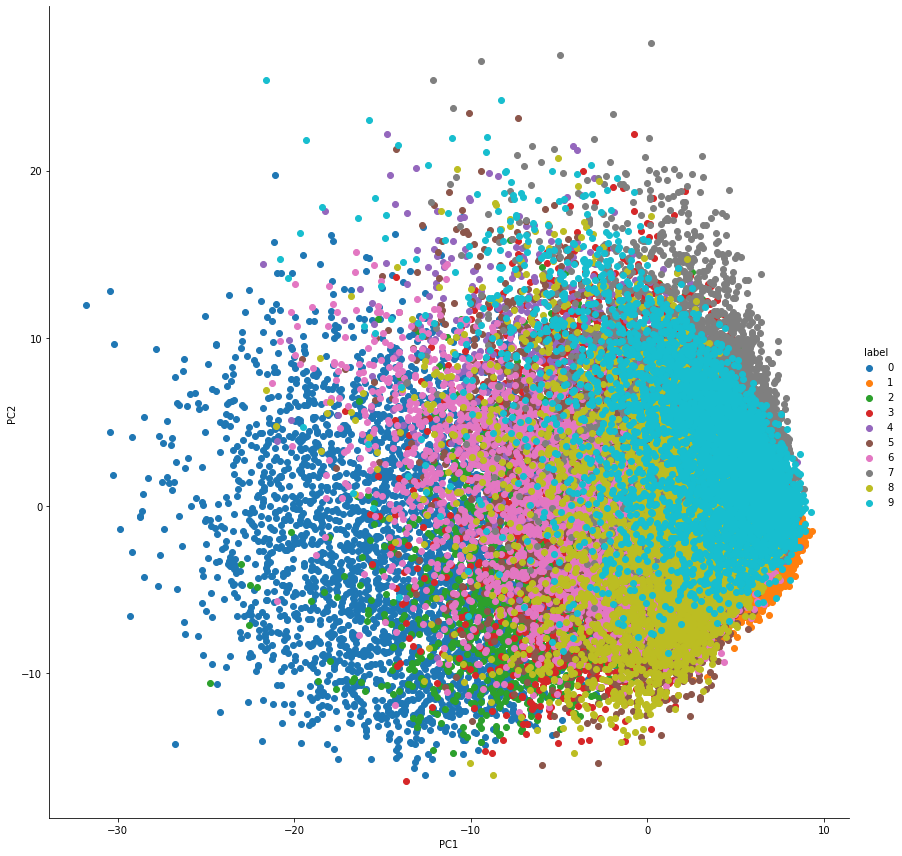

In [8]:
import seaborn as sns
g = sns.FacetGrid(principal_df, hue = 'label', height=12).map(plt.scatter, 'PC1', 'PC2').add_legend()

[(0, 's'), (1, 'x'), (2, 'o'), (3, '.'), (4, ','), (5, '<'), (6, '>'), (7, '^'), (8, '8'), (9, '*')]


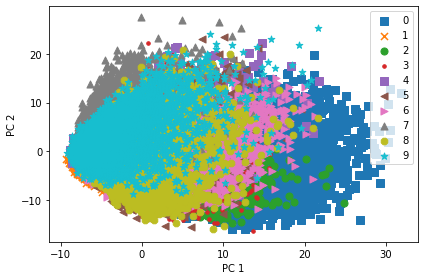

<Figure size 432x288 with 0 Axes>

(784, 2)


In [9]:
import warnings
warnings.filterwarnings('ignore')
X_pca = X_centered.dot(eigen_vectors[:,eigen_values_sorted[:2]])
markers = 's','x','o','.',',','<','>', '^','8','*'
colors = list(plt.rcParams['axes.prop_cycle'])
target = np.unique(y)
print(list(zip(target,markers)))
for idx, (t, m) in enumerate(zip(target, markers)):
    subset = X_pca[y == t]
    plt.scatter(subset[:, 0], subset[:, 1], s = 50,c = colors[idx]['color'], label = t, marker = m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.figure()
plt.show()
print(eigen_vectors[:,eigen_values_sorted[:2]].shape)